# INDEX
- RESUME
- GROUP STAGE MODELING
  - Choosing the model
  - XGB Boost - Tuning & Hold-out Validation
  - Creating a pipeline for the XGB model
- KNOCKOUT STAGE MODELING
  - Choosing a model for the Knockout Stage
  - Random Forest - Tuning & Hold-out Validation
  - XGB Boost - Tuning & Hold-out Validation
  - Creating a pipeline for the XGB Boost model

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
final_df = pd.read_csv(r'C:\Users\hp\Downloads\QATAR_2022_Prediction-master\QATAR_2022_Prediction-master\data\training.csv')
final_df.tail()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
9316,Netherlands,Wales,10,18,1,81.0,74.0,85.2,83.0,83.5,75.0,73.0,78.5
9317,Poland,Belgium,26,2,0,87.0,89.0,75.2,84.7,75.8,80.8,85.7,85.5
9318,Chile,Ghana,28,60,0,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
9319,Japan,Tunisia,23,35,0,73.0,64.0,75.2,75.0,77.5,70.8,72.3,74.0
9320,Korea Republic,Egypt,29,32,1,75.0,70.0,73.0,80.0,73.8,50.0,79.3,70.8


# GROUP STAGE MODELING

### Choosing a model

In [3]:
# I save the original data frame in a flag to then train the final pipeline
pipe_DF = final_df
# Dummies for categorical columns
final_df = pd.get_dummies(final_df)

I split the dataset into training, testing and validation.

In [4]:
X = final_df.drop('Team1_Result',axis=1)
y = final_df['Team1_Result'] # team1result predict karna hai
from sklearn.model_selection import train_test_split
# 10%= testing data, 90%= training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42) 
# in total 
# 90%=training data
# 5% validation set = used to train the model hyperparameters and test the model during training
# 5% holdout test case = used to test the model performance on unseen data at the end
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

 Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
X_hold_test = scaler.transform(X_hold_test)

Defining function to display the confusion matrix quickly.

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    try:
        disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    except AttributeError:
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()


* **Random Forest**

              precision    recall  f1-score   support

           0       0.48      0.59      0.53       116
           1       0.63      0.73      0.68       241
           2       0.28      0.12      0.17       110

    accuracy                           0.55       467
   macro avg       0.47      0.48      0.46       467
weighted avg       0.51      0.55      0.52       467



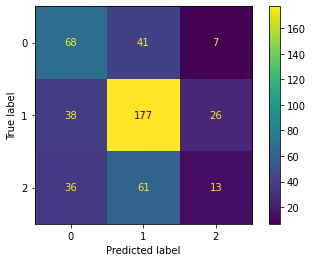

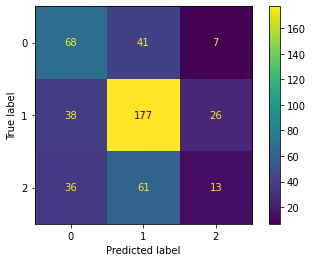

In [7]:
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

* **Ada Boost Classifier**

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.45      0.56      0.50       116
           1       0.63      0.82      0.71       241
           2       0.30      0.03      0.05       110

    accuracy                           0.57       467
   macro avg       0.46      0.47      0.42       467
weighted avg       0.51      0.57      0.50       467



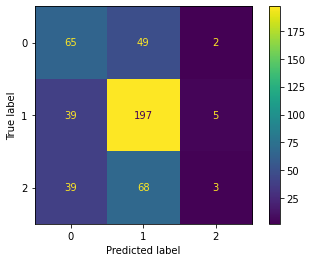

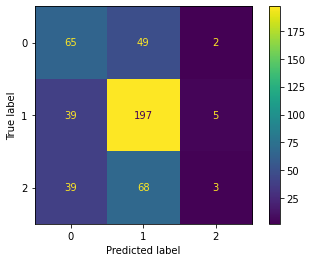

In [8]:
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

* **XGB Boost**

              precision    recall  f1-score   support

           0       0.45      0.53      0.49       116
           1       0.64      0.79      0.71       241
           2       0.27      0.08      0.13       110

    accuracy                           0.56       467
   macro avg       0.45      0.47      0.44       467
weighted avg       0.51      0.56      0.52       467



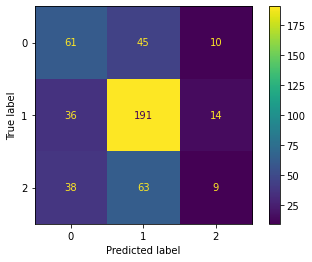

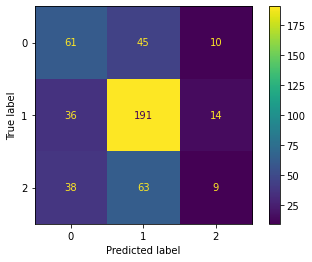

In [9]:
from xgboost import XGBClassifier
metrics_display(XGBClassifier())

In [10]:
# !pip uninstall tensorflow numpy


In [11]:
from tensorflow import keras
import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras import Input

X_train.shape

(8388, 404)

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4630 - loss: 1.1314 - val_accuracy: 0.5858 - val_loss: 0.9134
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5875 - loss: 0.9106 - val_accuracy: 0.5805 - val_loss: 0.9082
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5977 - loss: 0.8805 - val_accuracy: 0.5757 - val_loss: 0.9000
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6016 - loss: 0.8591 - val_accuracy: 0.5769 - val_loss: 0.9132
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6148 - loss: 0.8457 - val_accuracy: 0.5751 - val_loss: 0.9222
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6197 - loss: 0.8299 - val_accuracy: 0.5805 - val_loss: 0.9096
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6295 - loss: 0.8104 - val_accuracy: 0.5816 - val_loss: 0.9202
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6294 - loss: 0.7928 - val_accuracy: 0.

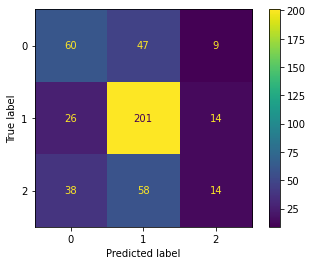

In [12]:
model = Sequential()
model.add(Input(shape=(404,)))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [200,250,300,350,400,450,500],
    "max_depth" : [3,4,5,6,7,8,9],
    "gamma" : [0.001,0.01,0.1],
    "learning_rate" : [0.001,0.01,0.1]
}

In [14]:
# make a GridSearchCV object
GS = GridSearchCV(estimator = XGBClassifier(use_label_encoder=False),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

The best result I found was: gamma = 0.01, learning_rate = 0.01, n_estimators = 300, max_depth = 4

In [15]:
#GS.fit(X_train,y_train)

To get only the best hyperparameter values

In [16]:
#print(GS.best_params_) 

* **Default Hyperparameters**

              precision    recall  f1-score   support

           0       0.52      0.55      0.53       121
           1       0.65      0.80      0.72       240
           2       0.33      0.13      0.19       105

    accuracy                           0.59       466
   macro avg       0.50      0.49      0.48       466
weighted avg       0.54      0.59      0.55       466



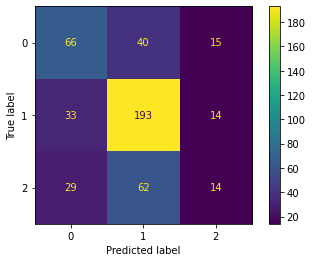

In [17]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

              precision    recall  f1-score   support

           0       0.55      0.58      0.56       121
           1       0.63      0.89      0.74       240
           2       0.00      0.00      0.00       105

    accuracy                           0.61       466
   macro avg       0.39      0.49      0.43       466
weighted avg       0.47      0.61      0.53       466



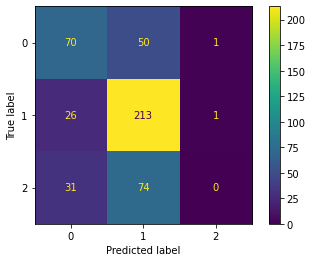

In [18]:
model = XGBClassifier(gamma = 0.01, learning_rate = 0.01, n_estimators = 300, max_depth = 4)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

The model improves a bit, so I will create a pipe to use the model later easily.

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
column_trans = make_column_transformer(
    (OneHotEncoder(),['Team1', 'Team2']),remainder='passthrough',force_int_remainder_cols=False)

pipe_X = pipe_DF.drop('Team1_Result',axis=1)
pipe_y = pipe_DF['Team1_Result']

from sklearn.pipeline import make_pipeline
pipe_League = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(gamma= 0.01, learning_rate= 0.01, n_estimators= 300, max_depth= 4))
pipe_League.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,...
                               feature_types=None, gamma=0.01, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [20]:
import joblib
# joblib.dump(pipe_League,"/content/drive/MyDrive/models/groups_stage_prediction.pkl")
joblib.dump(pipe_League, r"C:\Users\hp\Downloads\QATAR_2022_Prediction-master\QATAR_2022_Prediction-master\models\groups_stage_prediction.pkl")


['C:\\Users\\hp\\Downloads\\QATAR_2022_Prediction-master\\QATAR_2022_Prediction-master\\models\\groups_stage_prediction.pkl']

# KNOCKOUT STAGE


### Choosing the model 

Removing Draw status.

In [21]:
knock_df = pipe_DF[pipe_DF['Team1_Result'] != 2]

In [22]:
pipe_knock_df = knock_df
knock_df = pd.get_dummies(knock_df)
X = knock_df.drop('Team1_Result',axis=1)
y = knock_df['Team1_Result']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_hold_test, X_test, y_hold_test, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

* **Ada Boost Classifier**

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.69      0.62      0.65       243
           1       0.82      0.86      0.84       479

    accuracy                           0.78       722
   macro avg       0.75      0.74      0.74       722
weighted avg       0.77      0.78      0.78       722



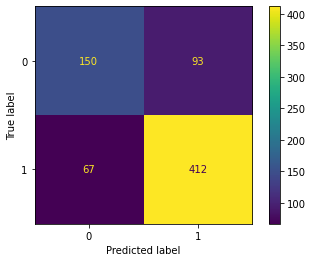

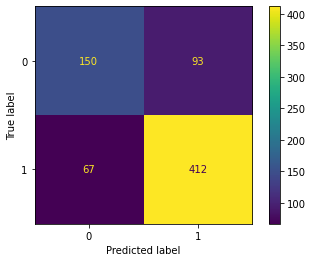

In [23]:
metrics_display(AdaBoostClassifier())

*   **Random Forest**




              precision    recall  f1-score   support

           0       0.65      0.64      0.64       243
           1       0.82      0.83      0.82       479

    accuracy                           0.76       722
   macro avg       0.73      0.73      0.73       722
weighted avg       0.76      0.76      0.76       722



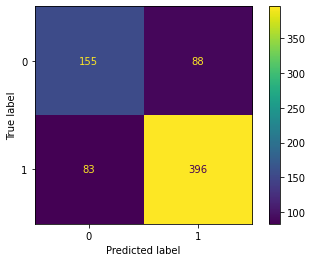

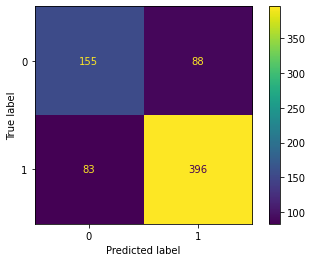

In [24]:
metrics_display(RandomForestClassifier())

* **XGB Boost**

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       243
           1       0.82      0.82      0.82       479

    accuracy                           0.76       722
   macro avg       0.73      0.74      0.74       722
weighted avg       0.76      0.76      0.76       722



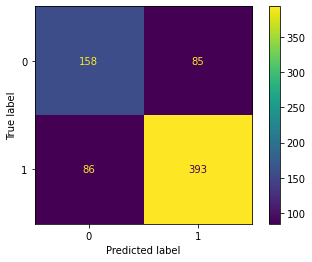

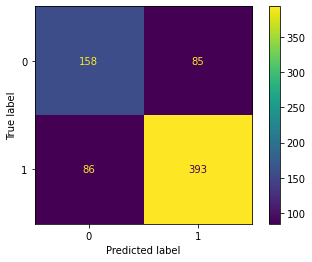

In [25]:
metrics_display(XGBClassifier())

* **Neural network**

In [26]:
X_train.shape

(5772, 399)

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6254 - loss: 2.0445 - val_accuracy: 0.7429 - val_loss: 0.5315
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7106 - loss: 0.5872 - val_accuracy: 0.7784 - val_loss: 0.5323
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7299 - loss: 0.5415 - val_accuracy: 0.7784 - val_loss: 0.4875
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7299 - loss: 0.5345 - val_accuracy: 0.7758 - val_loss: 0.4899
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7475 - loss: 0.5182 - val_accuracy: 0.7723 - val_loss: 0.5004
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7480 - loss: 0.5348 - val_accuracy: 0.7662 - val_loss: 0.4856
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7528 - loss: 0.5182 - val_accuracy: 0.7749 - val_loss: 0.4853
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7543 - loss: 0.4930 - val_accuracy: 0.

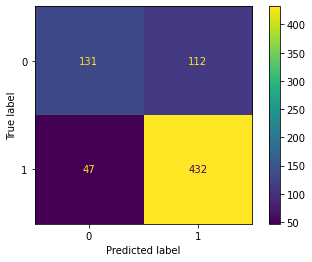

In [27]:
model = Sequential()
model.add(Input(shape=(399,)))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1,axis=1)
print(classification_report(y_test,y_pred1))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)

All models have very similar performance. Therefore I will tune the Random Forest model and the XGB Boost.

### Random Forest - Tuning & Hold-out Validation 

In [28]:
search_space = {
    "max_depth" : [11,12,13,14,15,16],
    "max_leaf_nodes" : [170,180,190,200,210,220,230],
    "min_samples_leaf" : [3,4,5,6,7,8],
    "n_estimators" : [310,320,330,340,350]
}

In [29]:
GS = GridSearchCV(estimator = RandomForestClassifier(),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

Uncomment the following lines to enable the tuning. The best result I found was: max_depth = 16, n_estimators = 320, max_leaf_nodes = 190, min_samples_leaf = 5

In [30]:
#GS.fit(X_train,y_train)

In [31]:
#print(GS.best_params_)

* **Default Hyperparameters**

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       288
           1       0.79      0.82      0.81       433

    accuracy                           0.76       721
   macro avg       0.75      0.75      0.75       721
weighted avg       0.76      0.76      0.76       721



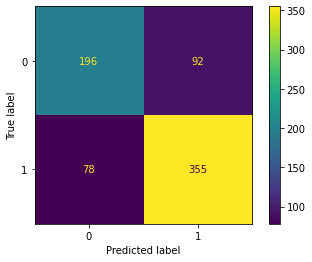

In [32]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

              precision    recall  f1-score   support

           0       0.76      0.57      0.65       288
           1       0.75      0.88      0.81       433

    accuracy                           0.75       721
   macro avg       0.76      0.72      0.73       721
weighted avg       0.76      0.75      0.75       721



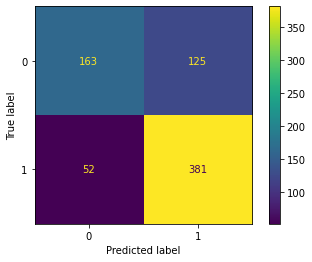

In [33]:
model = RandomForestClassifier(max_depth= 16, n_estimators=320, max_leaf_nodes= 190, min_samples_leaf= 5)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

The Random Forest greatly improves performance with the tuned hyperparameters; let's see the XGB Boost model.

### XGB Boost - Tuning & Hold-out Validation

In [34]:
search_space = {
    "n_estimators" : [300,350,400,450,500,550,600],
    "max_depth" : [3,4,5,6,7,8,9],
    "gamma" : [0.001,0.01,0.1],
    "learning_rate" : [0.001,0.01]
}

In [35]:
GS = GridSearchCV(estimator = XGBClassifier(use_label_encoder=False),
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 5,
                  verbose = 4)

In [36]:
#GS.fit(X_train,y_train)

In [37]:
#print(GS.best_params_) # to get only the best hyperparameter values that we searched for

Uncomment the following lines to enable the tuning. The best result I found was: gamma = 0.01, learning_rate = 0.01, max_depth = 5, n_estimators = 500

* **Default Hyperparameters**

              precision    recall  f1-score   support

           0       0.73      0.61      0.67       288
           1       0.77      0.85      0.81       433

    accuracy                           0.75       721
   macro avg       0.75      0.73      0.74       721
weighted avg       0.75      0.75      0.75       721



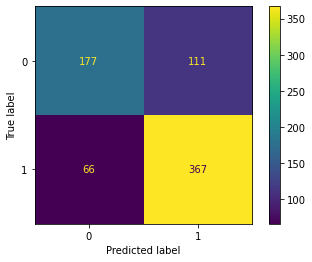

In [38]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

* **Tuned Hyperparameters**

              precision    recall  f1-score   support

           0       0.73      0.62      0.67       288
           1       0.77      0.84      0.81       433

    accuracy                           0.76       721
   macro avg       0.75      0.73      0.74       721
weighted avg       0.75      0.76      0.75       721



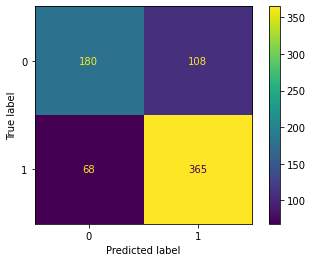

In [39]:
model = XGBClassifier(gamma=0.01,learning_rate=0.01, max_depth=5, n_estimators=500)
model.fit(X_train,y_train)
y_pred = model.predict(X_hold_test)
print(classification_report(y_hold_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_hold_test,y_pred);

The model does not improve notably. However, it does improve compared to the Random Forest.

### Creating a pipeline for the XGB Boost model

In [40]:
from sklearn.compose import ColumnTransformer
pipe_X = pipe_knock_df.drop('Team1_Result',axis=1)
pipe_y = pipe_knock_df['Team1_Result']
pipe_knock = make_pipeline(column_trans,StandardScaler(with_mean=False),XGBClassifier(gamma=0.01,learning_rate=0.01, max_depth=5, n_estimators=500))
pipe_knock.fit(pipe_X,pipe_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Team1', 'Team2'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,...
                               feature_types=None, gamma=0.01, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=500, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [41]:
joblib.dump(pipe_knock,r"C:\Users\hp\Downloads\QATAR_2022_Prediction-master\QATAR_2022_Prediction-master\models\knockout_stage_prediction.pkl")

['C:\\Users\\hp\\Downloads\\QATAR_2022_Prediction-master\\QATAR_2022_Prediction-master\\models\\knockout_stage_prediction.pkl']